In [2]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [12]:
plt.rcParams["figure.figsize"] = (20, 10)

In [2]:
df = pd.read_csv("../data/final_landslides.csv",index_col=0)

In [3]:
print(f'Class ratio is {(df["true_slide"].sum() / len(df))}')

Class ratio is 0.1727755703379615


# Neural Net

In [4]:
nn_training_data = pd.read_csv('../data/model_output/nn_training_data.csv', index_col=0)
test_data = nn_training_data[['Fold Number', 'Epoch', 'Validation Loss', 'Validation Accuracy', 
                              'Validation Recall', 'Validation Precision', 'Validation AUC']]
nn_training_data = nn_training_data.drop(['Validation Loss', 'Validation Accuracy', 'Validation Recall', 
                                          'Validation Precision', 'Validation AUC'], 1)
test_data = test_data.rename(columns={'Validation Loss': 'Binary Cross-Entropy Loss', 'Validation Accuracy': 'Accuracy',
                                      'Validation Recall': 'Recall', 'Validation Precision': 'Precision', 'Validation AUC': 'AUC'})
nn_training_data['Validation'] = 0
test_data['Validation'] = 1
nn_training_data = pd.concat([nn_training_data, test_data])

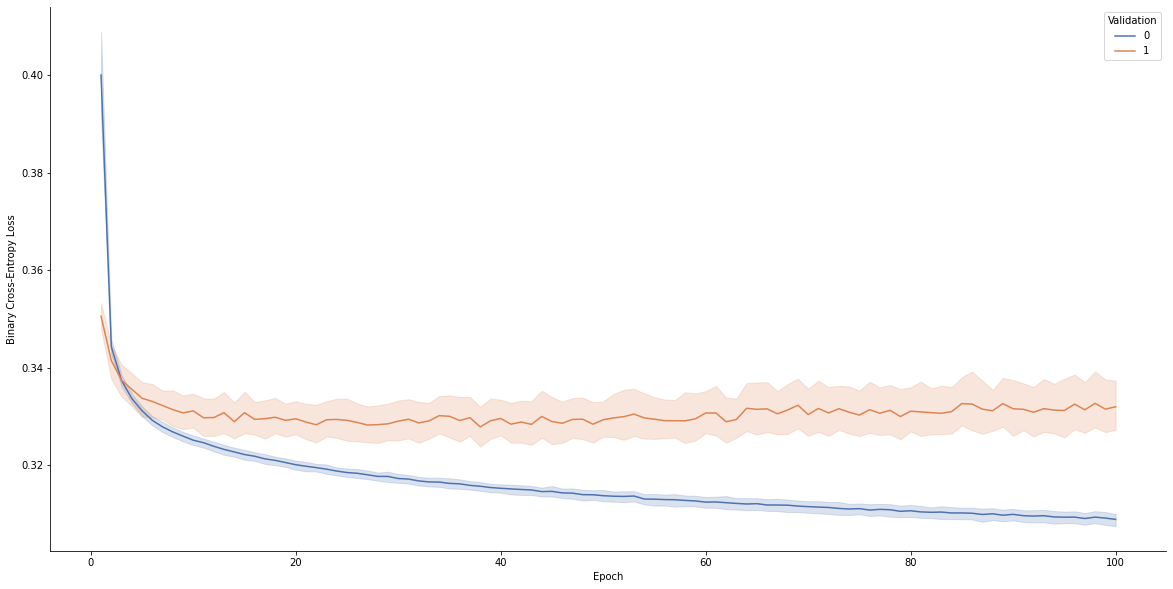

In [5]:
plt.rcParams["figure.figsize"] = (20, 10)
sns.lineplot(data=nn_training_data, x='Epoch', y='Binary Cross-Entropy Loss', 
             hue='Validation', palette='deep');
sns.despine();
plt.savefig('../img/nn_training_test_loss.png')

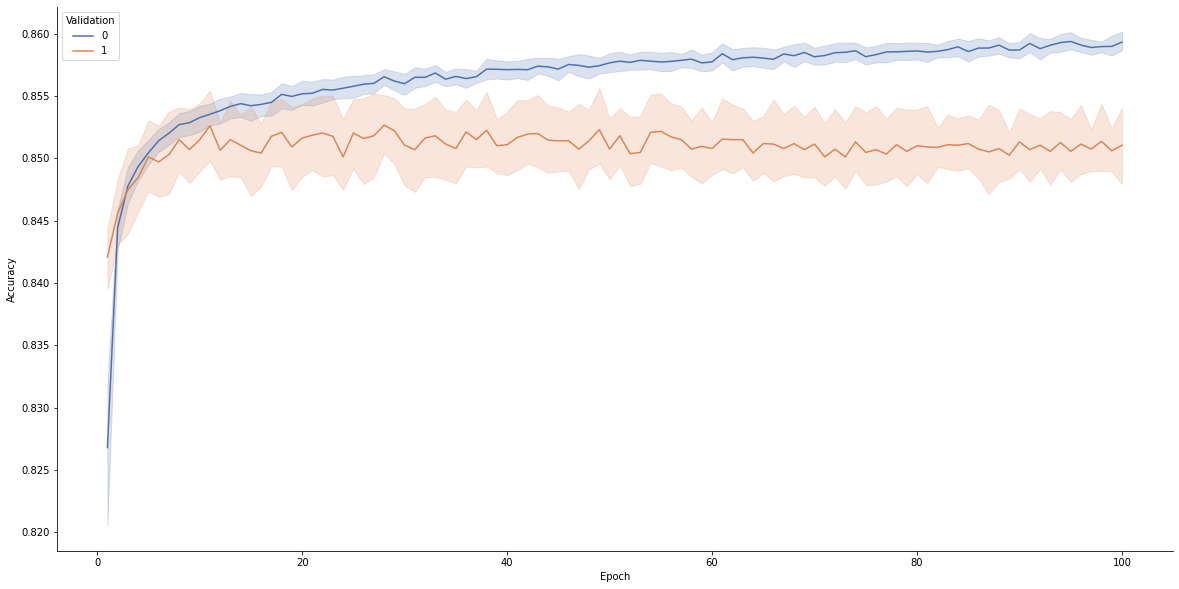

In [6]:
sns.lineplot(data=nn_training_data, x='Epoch', y='Accuracy', 
             hue='Validation', palette='deep');
sns.despine();
plt.savefig('../img/nn_training_test_accuracy.png')

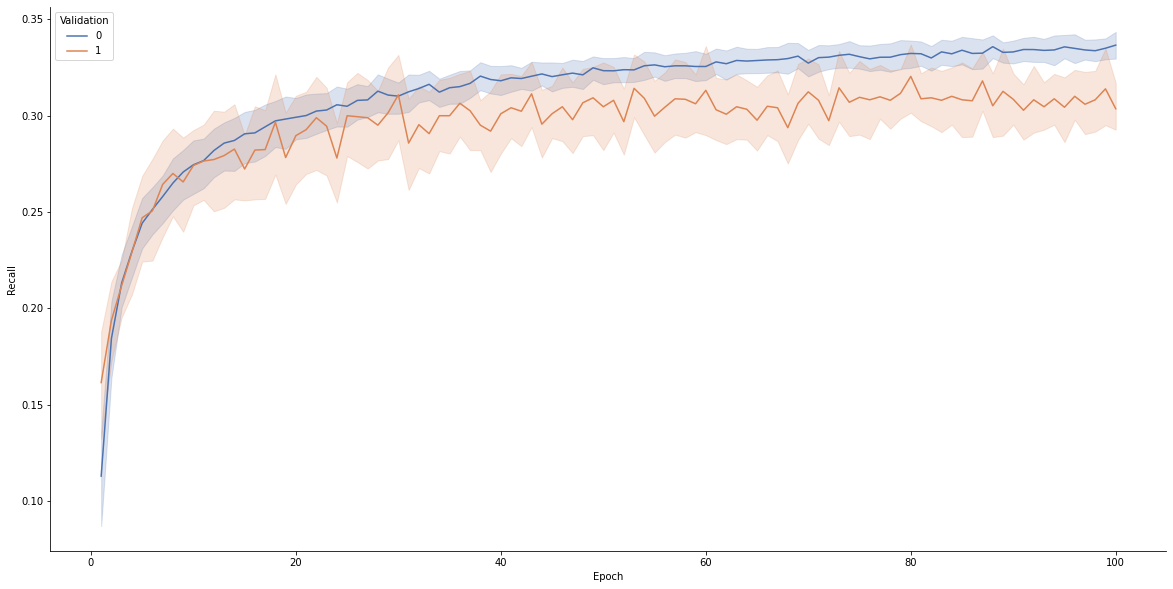

In [7]:
plt.rcParams["figure.figsize"] = (20, 10)
sns.lineplot(data=nn_training_data, x='Epoch', y='Recall', 
             hue='Validation', palette='deep');
sns.despine();
plt.savefig('../img/nn_training_test_recall.png')

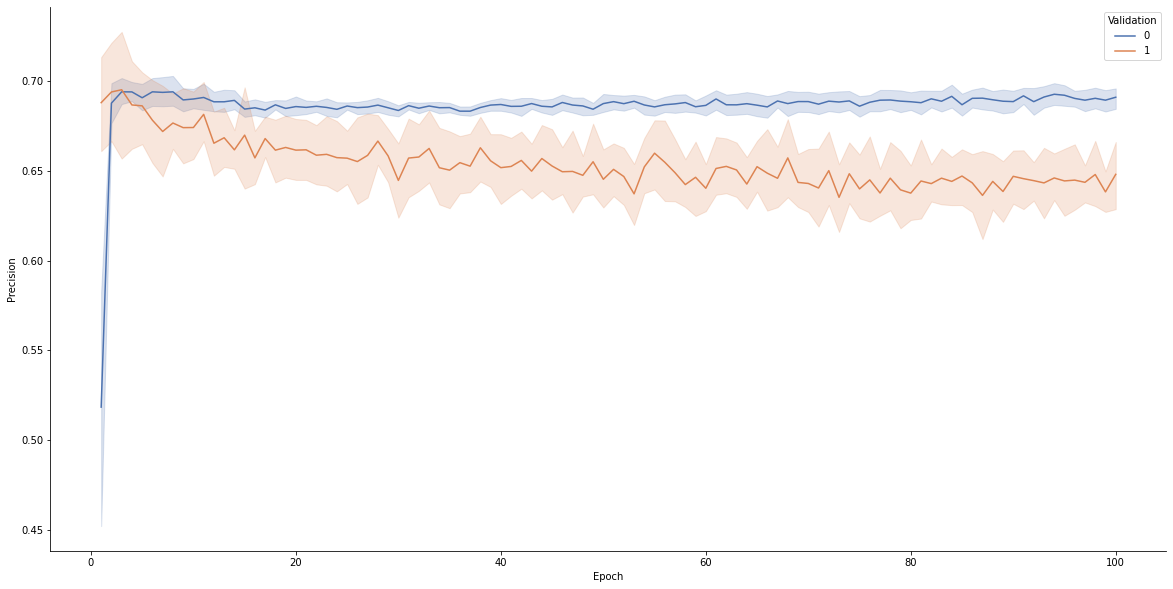

In [8]:
plt.rcParams["figure.figsize"] = (20, 10)
sns.lineplot(data=nn_training_data, x='Epoch', y='Precision', 
             hue='Validation', palette='deep');
sns.despine();
plt.savefig('../img/nn_training_test_precision.png')

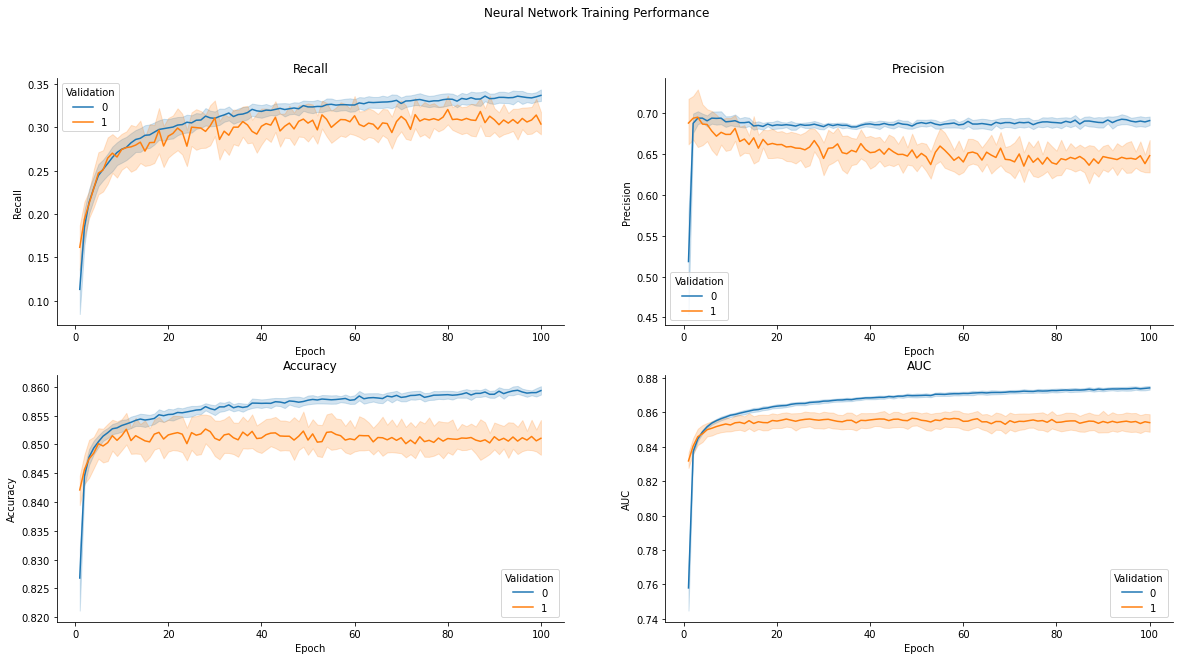

In [9]:
fig, axes = plt.subplots(2, 2)
fig.suptitle('Neural Network Training Performance')
sns.lineplot(ax=axes[0,0], x='Epoch', y='Recall', data=nn_training_data, hue='Validation')
sns.lineplot(ax=axes[0,1], x='Epoch', y='Precision', data=nn_training_data,hue='Validation')
sns.lineplot(ax=axes[1,0], x='Epoch', y='Accuracy', data=nn_training_data, hue='Validation')
sns.lineplot(ax=axes[1,1], x='Epoch', y='AUC', data=nn_training_data, hue='Validation')
axes[0,0].set_title('Recall')
axes[0,1].set_title('Precision')
axes[1,0].set_title('Accuracy')
axes[1,1].set_title('AUC')
sns.despine()
plt.savefig('../img/nn_training_perf.png')

In [10]:
nn_test_data = pd.read_csv('../data/model_output/nn_comparable_test_data.csv')
nn_test_data.columns = ['Fold', 'Log Loss', 'Accuracy', 'AUC', 'Precision', 'Recall']

In [11]:
nn_test_data.head()

,Fold,Log Loss,Accuracy,AUC,Precision,Recall
0,1,8.218528,0.762054,0.739653,0.394509,0.705426
1,2,7.216264,0.791071,0.757192,0.435407,0.705426
2,3,7.370463,0.786607,0.768804,0.431579,0.741602
3,4,7.956411,0.769643,0.783082,0.414115,0.803618
4,5,8.064339,0.766518,0.757684,0.404494,0.744186


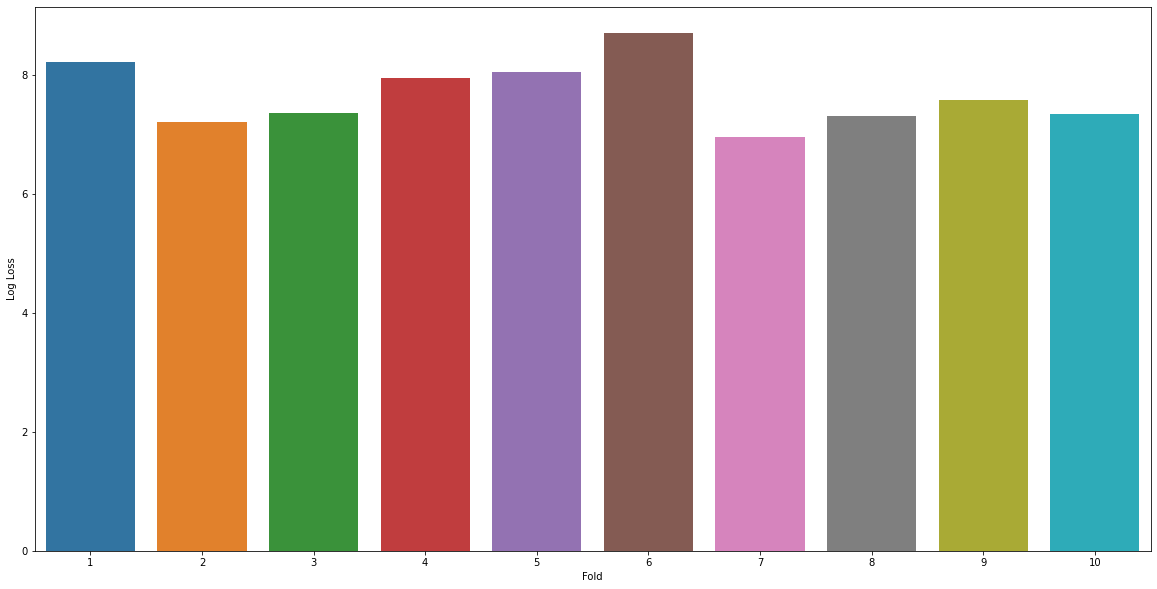

In [12]:
ax = sns.barplot(x="Fold", y="Log Loss", data=nn_test_data)

# XGBoost

In [21]:
xgb_fi = pd.read_csv('../data/model_output/xgb_feature_importances.csv')
xgb_fi.columns = ['Fold' if index==0 else x for index, x in enumerate(xgb_fi.columns)]
# xgb_fi['Model'] = 'XGBoosted Trees'
xgb_test_data = pd.read_csv('../data/model_output/xgb_test_data.csv')
xgb_test_data.columns = ['Fold', 'Log Loss', 'Accuracy', 'AUC', 'Precision', 'Recall']
xgb_test_data['Fold'] = xgb_test_data['Fold']+1

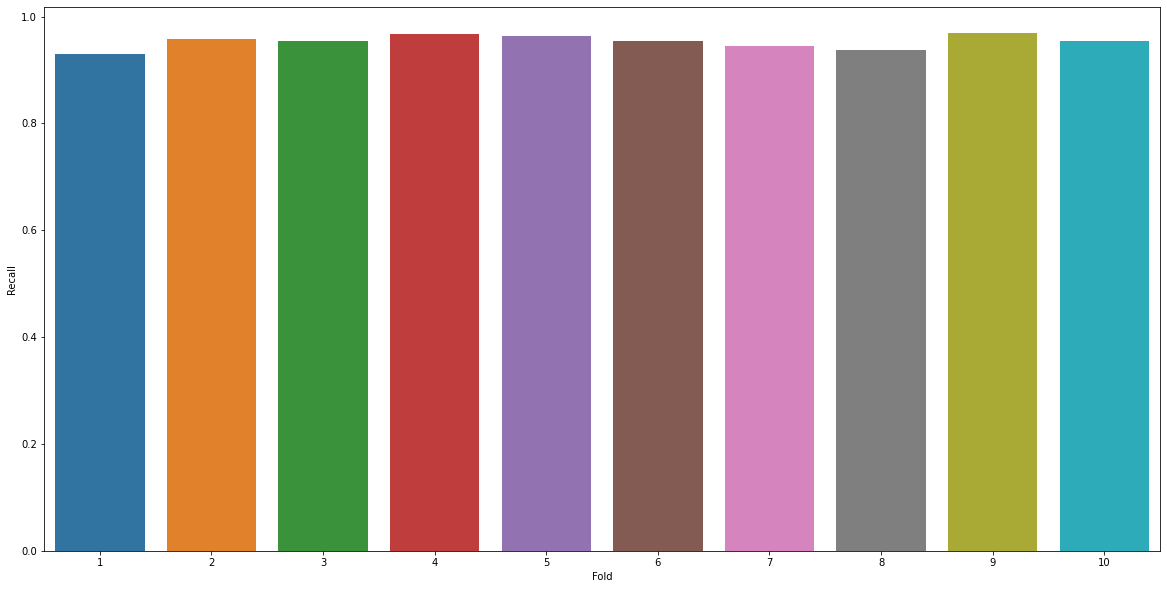

In [25]:
ax = sns.barplot(x="Fold", y="Recall", data=xgb_test_data)

# Logit

In [15]:
lr_coeff = pd.read_csv('../data/model_output/logit_coefficients.csv')
lr_coeff.columns = ['Fold' if index==0 else x for index, x in enumerate(lr_coeff.columns)]
# lr_coeff['Model'] = 'Logistic Regression'
logit_test_data = pd.read_csv('../data/model_output/logit_test_data.csv')
logit_test_data.columns = ['Fold', 'Log Loss', 'Accuracy', 'AUC', 'Precision', 'Recall']
logit_test_data.head()

,Fold,Log Loss,Accuracy,AUC,Precision,Recall
0,1,7.432112,0.784821,0.684930,0.406312,0.532300
1,2,6.691981,0.806250,0.706059,0.450526,0.552972
2,3,6.877019,0.800893,0.715087,0.442270,0.583979
3,4,6.537792,0.810714,0.725112,0.462777,0.594315
4,5,6.969531,0.798214,0.701202,0.434077,0.552972


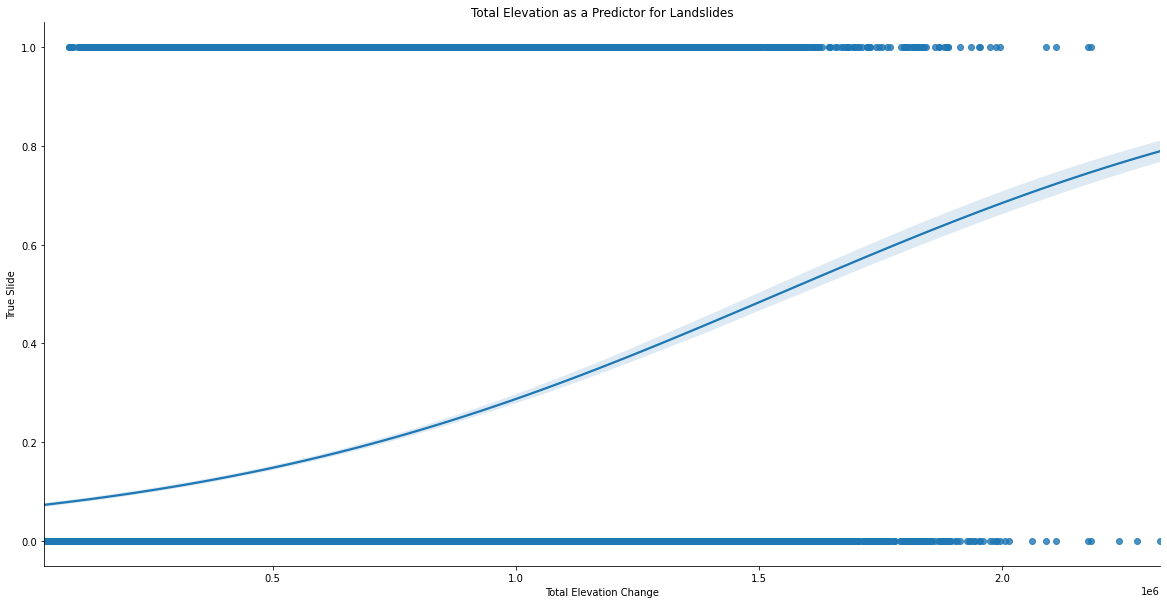

In [26]:
logit_predictions = pd.read_csv('../data/model_output/logit_predictions.csv', index_col=0)
ax = sns.regplot(x='total_elev_change', y='True Slide', data=logit_predictions, logistic=True)
sns.despine();
ax.set_title('Total Elevation as a Predictor for Landslides')
ax.set_xlabel('Total Elevation Change');
plt.savefig('../img/logit_elevation.png')

In [8]:
logit_test_data['Model'] = 'Logisitic Regression'
xgb_test_data['Model'] = 'XGBoosted Trees'

nn_test_data['Model'] = 'Neural Network'
test_df = pd.concat([logit_test_data, xgb_test_data, nn_test_data])
ax = sns.barplot(x="Fold", y="Recall", hue='Model', data=test_df);
sns.despine();
plt.savefig('../img/recall_comparison_by_fold.png')

NameError: name 'logit_test_data' is not defined

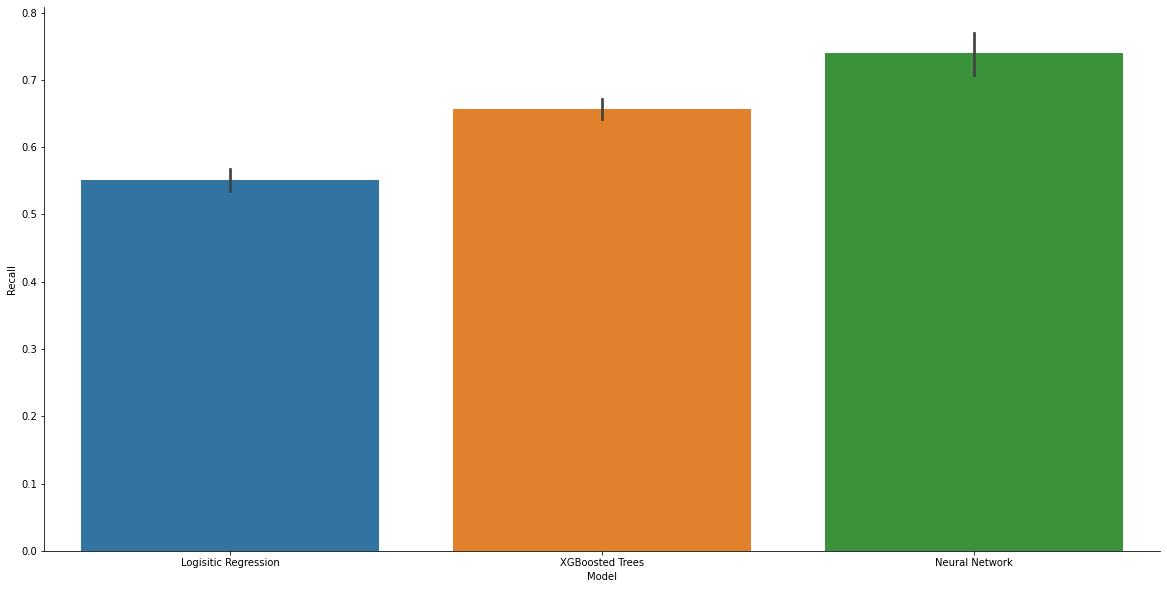

In [17]:
ax = sns.barplot(x="Model", y="Recall", data=test_df);
sns.despine();
plt.savefig('../img/recall_comparison_overall.png')

## Feature Importances

In [18]:
xgb_fi_mean = pd.DataFrame(xgb_fi.mean()).T
xgb_fi_mean['Model'] = 'XGBoosted Trees'
xgb_fi_mean.head()
lr_fi_mean  = pd.DataFrame(lr_coeff.mean()).T
lr_fi_mean['Model'] = 'Logistic Regression'
fis = pd.concat([xgb_fi_mean, lr_fi_mean])
fis.head()

,latitude,longitude,max_elev_change,median_elev,mean_elev,mean_median_diff,total_elev,median_elev_change,mean_elev_change,total_elev_change,Precip_30_min_before,Precip_60_min_before,Precip_90_min_before,Precip_120_min_before,fire_<=1_year_before,fire_<=3_year_before,fire_<=5_year_before,Model
0,0.045219,0.138302,0.044941,0.053564,0.064004,0.036954,0.000000,0.028501,0.027501,0.182099,0.081108,0.050129,0.078879,0.077117,0.031420,0.027868,0.032393,XGBoosted Trees
0,0.173958,-0.220922,0.018121,-0.072500,-0.296644,0.195427,-0.296644,-0.048617,0.060508,0.830513,0.268993,-0.050608,0.157446,0.205106,-0.045606,0.032844,0.018658,Logistic Regression


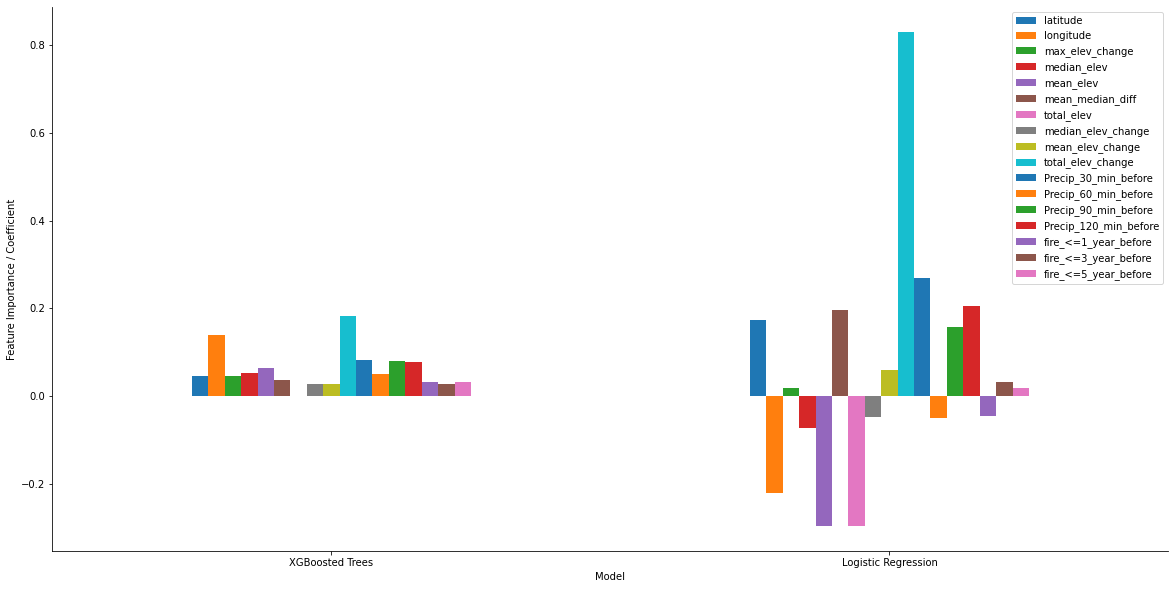

In [21]:
fig,ax = plt.subplots()
fis.plot.bar(rot=0, x='Model', sharex=True, ax=ax);
plt.ylabel('Feature Importance / Coefficient')
sns.despine()
plt.savefig('../img/lr_and_xgboost_feature_importances.png')

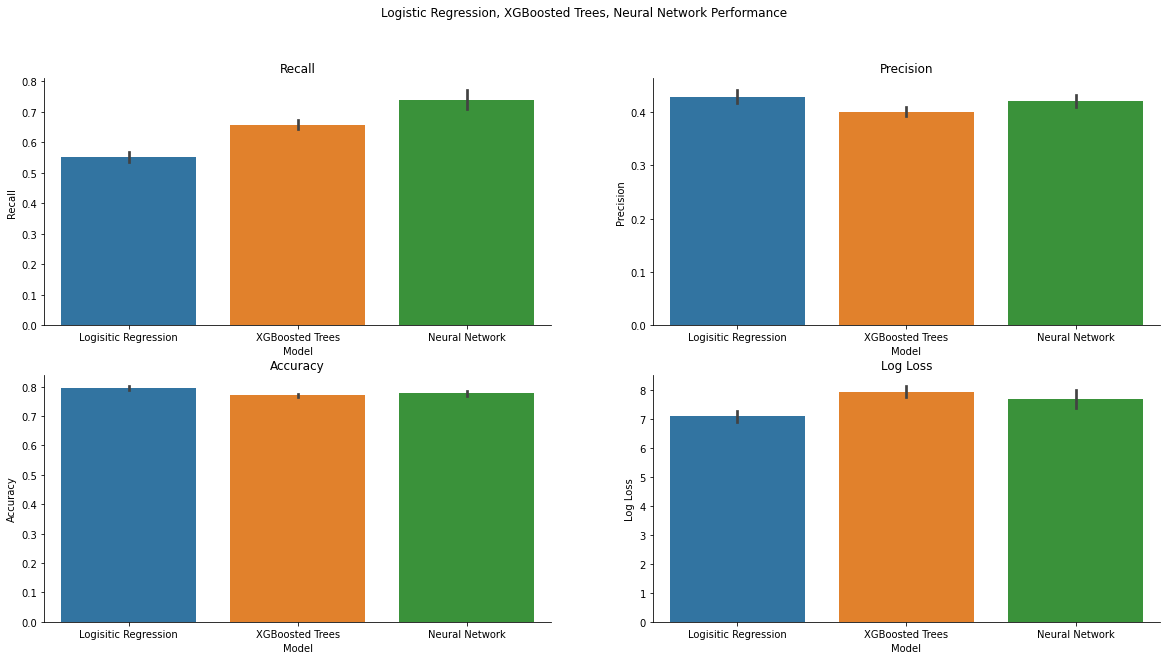

In [20]:
fig, axes = plt.subplots(2, 2)
fig.suptitle('Logistic Regression, XGBoosted Trees, Neural Network Performance')
sns.barplot(ax=axes[0,0], x='Model', y='Recall', data=test_df)
sns.barplot(ax=axes[0,1], x='Model', y='Precision', data=test_df)
sns.barplot(ax=axes[1,0], x='Model', y='Accuracy', data=test_df)
sns.barplot(ax=axes[1,1], x='Model', y='Log Loss', data=test_df)
axes[0,0].set_title('Recall')
axes[0,1].set_title('Precision')
axes[1,0].set_title('Accuracy')
axes[1,1].set_title('Log Loss')
sns.despine()
plt.savefig('../img/perf_comp_with_tuning.png')